# Basics of Computation

## Vectors and Matrices

### Vectors

In [1]:
a = [1, 2, 3]
2 * a

3-element Vector{Int64}:
 2
 4
 6

In [2]:
b = [4, 5 ,6]
a + b

3-element Vector{Int64}:
 5
 7
 9

In [3]:
a .* b

3-element Vector{Int64}:
  4
 10
 18

- inner prod

In [4]:
sum(a .* b)

32

In [5]:
a' * b

32

### Matrices

In [6]:
A = [1 2 3;
    4 5 6]
B = [10 20 30;
    40 50 60]
A + B

2×3 Matrix{Int64}:
 11  22  33
 44  55  66

In [7]:
A'

3×2 adjoint(::Matrix{Int64}) with eltype Int64:
 1  4
 2  5
 3  6

In [8]:
A' * B

3×3 Matrix{Int64}:
 170  220  270
 220  290  360
 270  360  450

In [9]:
A * B

LoadError: DimensionMismatch: matrix A has dimensions (2,3), matrix B has dimensions (2,3)

- Application of Transpose into Bivariate Functions

In [10]:
a = [1, 2, 3]
b = [4, 5]
a * b'

3×2 Matrix{Int64}:
  4   5
  8  10
 12  15

In [11]:
f2(x, y) = 2*x + y
f2.(a, b')

3×2 Matrix{Int64}:
  6   7
  8   9
 10  11

- Inverse Matrix

In [12]:
A = [1 2;
    3 4]
A⁻¹ = inv(A)

2×2 Matrix{Float64}:
 -2.0   1.0
  1.5  -0.5

In [13]:
A * A⁻¹

2×2 Matrix{Float64}:
 1.0          0.0
 8.88178e-16  1.0

In [14]:
A⁻¹ * A

2×2 Matrix{Float64}:
 1.0          0.0
 2.22045e-16  1.0

In [15]:
println(A⁻¹)

[-1.9999999999999996 0.9999999999999998; 1.4999999999999998 -0.4999999999999999]


- Tips to Avoid Numerical Errors

In [16]:
A = Rational{Int}[1 2;
    3 4]
B = inv(A)
println(A * B)
println(B * A)

Rational{Int64}[1//1 0//1; 0//1 1//1]
Rational{Int64}[1//1 0//1; 0//1 1//1]


- Solving Equations Using Inverse Matrix

$x+2y=-1$

$3x+4y=1$

In [17]:
A = Rational{Int}[1 2;
    3 4]
sol = inv(A) * [-1, 1]

2-element Vector{Rational{Int64}}:
  3//1
 -2//1

## Computation of Statistics

In [18]:
using Statistics

In [19]:
X = rand(5)
Y = rand(2, 5)

2×5 Matrix{Float64}:
 0.361861  0.392971  0.312206  0.13899   0.704024
 0.61651   0.540293  0.275913  0.120178  0.231798

### Sum & Mean

In [20]:
println(sum(X))
println(mean(X))

1.1157390419877364
0.22314780839754728


In [21]:
println(sum(Y))
println(sum(Y, dims=1))
println(sum(Y, dims=2))
println(mean(Y))
println(mean(Y, dims=1))
println(mean(Y, dims=2))

3.6947440551914945
[0.9783707808227773 0.9332643249676108 0.5881193704845369 0.2591674030225274 0.935822175894042]
[1.9100520080043624; 1.7846920471871317;;]
0.36947440551914945
[0.48918539041138864 0.4666321624838054 0.29405968524226844 0.1295837015112637 0.467911087947021]
[0.38201040160087246; 0.35693840943742633;;]


### Variance & Standard Deviation
- ddof = 1

In [22]:
println(var(X))
println(std(X))
println(std(X) ^2)

0.04625023990578629
0.21505868944496592
0.0462502399057863


### Covariance
- ddof = 1

In [23]:
cov(Y, dims=1)

5×5 Matrix{Float64}:
  0.0324232    0.0187577   -0.00462106   -0.00239522   -0.060126
  0.0187577    0.0108519   -0.00267341   -0.0013857    -0.0347846
 -0.00462106  -0.00267341   0.00065861    0.000341375   0.00856937
 -0.00239522  -0.0013857    0.000341375   0.000176943   0.00444173
 -0.060126    -0.0347846    0.00856937    0.00444173    0.111499

In [24]:
cov(Y, dims=2)

2×2 Matrix{Float64}:
 0.0420377   0.00491905
 0.00491905  0.0448193

## Statistics as Parameters for Distributions

In [25]:
using Distributions

In [26]:
μ = 1.5
σ = 2.0
Z = rand(Normal(μ, σ), 10000)
println(mean(Z))
println(std(Z))

1.5175708652716846
2.017236256726007


## Computations of Differentials

### Numerical Differentiation of Univariate Functions

In [27]:
using PyPlot

In [28]:
f(x) = -(x + 1) * (x - 1) # def univariate func f(x)
h = 1e-10 # h ≈ 0
f⁽¹⁾(a) = (f(a + h) - f(a)) / h # derivative

f⁽¹⁾ (generic function with 1 method)

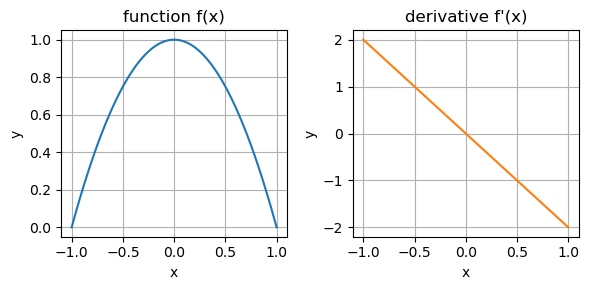

In [29]:
xs = range(-1, 1, length=100)

fig, ax = subplots(1, 2, figsize=(6, 3))

ax[1].plot(xs, f.(xs), "C0")
ax[1].grid()
ax[1].set(xlabel="x", ylabel="y", title="function f(x)")

ax[2].plot(xs, f⁽¹⁾.(xs), "C1")
ax[2].grid()
ax[2].set(xlabel="x", ylabel="y", title="derivative f'(x)");

tight_layout()

### Differentiation of Multivariate Functions

In [30]:
f₂(x) = -(x .+ 1)' * (x .- 1) # def bivariate func
∇f₂(x) = -2x # gradient

∇f₂ (generic function with 1 method)

In [31]:
using LaTeXStrings

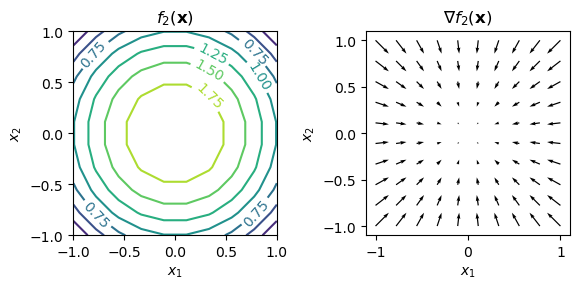

In [32]:
L = 10
xs1 = range(-1, 1, length=L)
xs2 = range(-1, 1, length=L)

fig, ax = subplots(1, 2, figsize=(6, 3))

cs = ax[1].contour(xs1, xs2, [f₂([x1, x2]) for x1 in xs1, x2 in xs2]')
ax[1].clabel(cs, inline=true)
ax[1].set(xlabel=L"$x_1$", ylabel=L"$x_2$", title=L"$f_2(\mathbf{x})$")

vec = [∇f₂([x1, x2]) for x1 in xs1, x2 in xs2]
getval(arr, idx) = arr[idx]
ax[2].quiver(repeat(xs1, 1, L), repeat(xs2, L, 1), getval.(vec, 1), getval.(vec, 2))
ax[2].set(xlabel=L"$x_1$", ylabel=L"$x_2$", title=L"$\nabla f_2(\mathbf{x})$")

tight_layout()

## Automatic Differentiation

In [33]:
using ForwardDiff

- Quadratic Function

In [34]:
f(x) = -(x + 1) * (x - 1) # def univariate func f(x)
f⁽¹⁾(x) = ForwardDiff.derivative(f, x) # derivative

f⁽¹⁾ (generic function with 1 method)

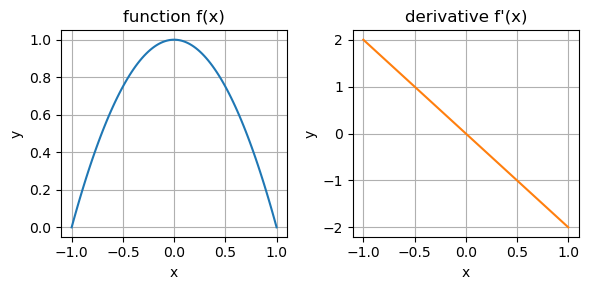

In [35]:
xs = range(-1, 1, length=100)

fig, ax = subplots(1, 2, figsize=(6, 3))

ax[1].plot(xs, f.(xs), "C0")
ax[1].grid()
ax[1].set(xlabel="x", ylabel="y", title="function f(x)")

ax[2].plot(xs, f⁽¹⁾.(xs), "C1")
ax[2].grid()
ax[2].set(xlabel="x", ylabel="y", title="derivative f'(x)");

tight_layout()

- sin(x)

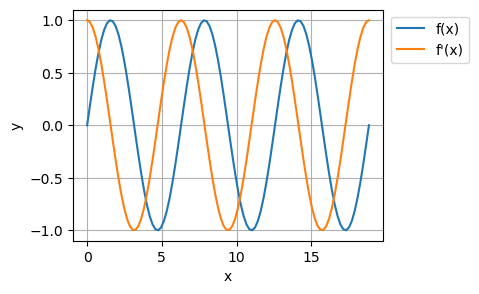

In [36]:
xs = range(0, 2pi * 3, length=100)

fig, ax = subplots(figsize=(4, 3))

ax.plot(xs, sin.(xs), color="C0", label="f(x)")
ax.plot(xs, map(x -> ForwardDiff.derivative(sin, x), xs),
    color="C1", label="f'(x)")
ax.grid()
ax.set(xlabel="x", ylabel="y")
ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1));

- Sigmoid

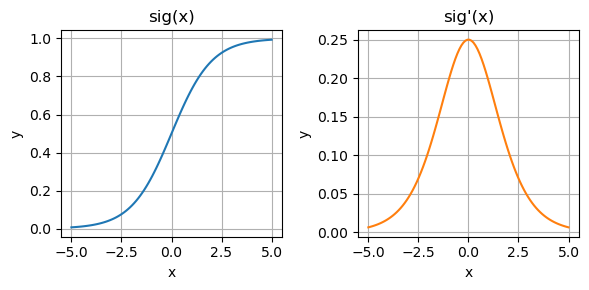

In [37]:
sig(x) = 1 / (1 + exp(-x))
xs = range(-5, 5, length=100)

fig, ax = subplots(1, 2, figsize=(6, 3))

ax[1].plot(xs, sig.(xs), "C0")
ax[1].grid()
ax[1].set(xlabel="x", ylabel="y", title="sig(x)")

ax[2].plot(xs,  map(x -> ForwardDiff.derivative(sig, x), xs), "C1")
ax[2].grid()
ax[2].set(xlabel="x", ylabel="y", title="sig'(x)");

tight_layout()

## Optimization of Functions

### Gradient Method on Univariate Function

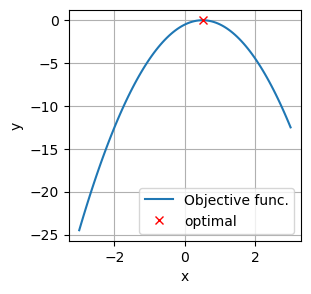

In [38]:
# Objective Function

x_opt = .5
f(x) = -2(x - x_opt) ^2

fig, ax = subplots(figsize=(3, 3))
xs = range(-3, 3, length=100)
ax.plot(xs, f.(xs), label="Objective func.")
ax.plot(x_opt, f(x_opt), "rx", label="optimal")
ax.set(xlabel="x", ylabel="y")
ax.grid()
ax.legend();

In [39]:
function gradient_method_1d(f, x0, η, maxiter)
    x_seq = Array{typeof(x0), 1}(undef, maxiter) # array to record progress
    ∇f(x) = ForwardDiff.derivative(f, x)
    
    for i in 1:maxiter
        x_seq[i] = i > 1 ? x_seq[i-1] + η * ∇f(x_seq[i-1]) : x0
    end
    
    x_seq
end

gradient_method_1d (generic function with 1 method)

In [40]:
x0, η, maxiter = -2.5, .1, 20
x_seq = gradient_method_1d(f, x0, η, maxiter)
f_seq = f.(x_seq)

20-element Vector{Float64}:
 -18.0
  -6.479999999999999
  -2.3327999999999993
  -0.8398079999999998
  -0.30233087999999986
  -0.10883911679999994
  -0.03918208204799999
  -0.014105549537279988
  -0.0050779978334207915
  -0.0018280792200314835
  -0.0006581085192113332
  -0.0002369190669160795
  -8.529086408978862e-5
  -3.07047110723239e-5
  -1.1053695986036396e-5
  -3.979330554973165e-6
  -1.4325589997903394e-6
  -5.157212399245448e-7
  -1.8565964637284966e-7
  -6.683747269421776e-8

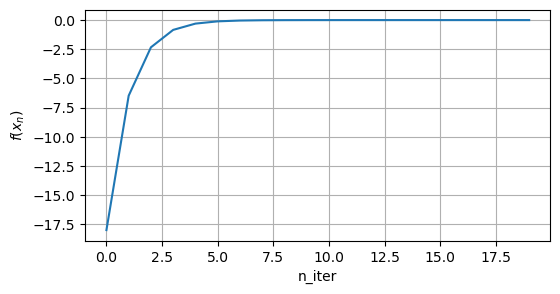

In [41]:
fig, ax = subplots(figsize=(6, 3))
ax.plot(f_seq)
ax.set(xlabel="n_iter", ylabel=L"f(x_n)")
ax.grid();

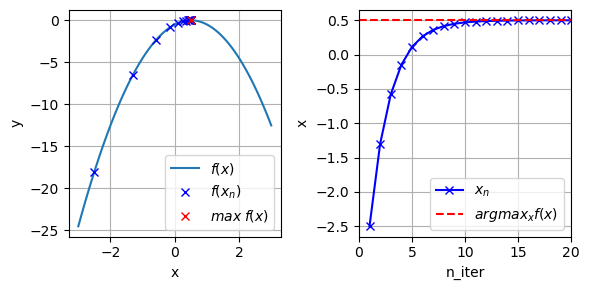

In [42]:
fig, ax = subplots(1, 2, figsize=(6, 3))

ax[1].plot(xs, f.(xs), label=L"$f(x)$")
ax[1].plot(x_seq, f_seq, "bx", label=L"$f(x_n)$")
ax[1].plot(x_opt, f(x_opt), "rx", label=L"max\;f(x)")
ax[1].set(xlabel="x", ylabel="y")
ax[1].legend()
ax[1].grid()

ax[2].plot(1:maxiter, x_seq, "bx-", label=L"x_n")
ax[2].hlines(x_opt, 0, maxiter, color="r", ls="--", label=L"argmax_{x}f(x)")
ax[2].set_xlim([0, maxiter])
ax[2].set(xlabel="n_iter", ylabel="x")
ax[2].legend()
ax[2].grid()

tight_layout()

### Gradient Method on Multivariate Function

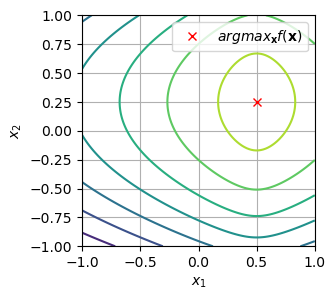

In [43]:
# Objective Function

x_opt = [.5, .25]
f2(x) = -sqrt(.05 + (x[1] - x_opt[1]) ^2) - (x[2] - x_opt[2]) ^2

L = 100
xs1 = xs2 = range(-1, 1, length=L)

fig, ax = subplots(figsize=(3, 3))
ax.contour(xs1, xs2, [f2([x1, x2]) for x1 in xs1, x2 in xs2]')
ax.plot(x_opt[1], x_opt[2], "rx", label=L"argmax_\mathbf{x}f(\mathbf{x})")
ax.set(xlabel=L"x_1", ylabel=L"x_2")
ax.grid()
ax.legend();

In [44]:
function gradient_method(f, x0, η, maxiter)
    x_seq = Array{typeof(x0[1]), 2}(undef, length(x0), maxiter) # array to record progress
    ∇f(x) = ForwardDiff.gradient(f, x)
    
    for i in 1:maxiter
        x_seq[:, i] = i > 1 ? x_seq[:, i-1] + η * ∇f(x_seq[:, i-1]) : x0
    end
    
    x_seq
end

gradient_method (generic function with 1 method)

In [45]:
x0, η, maxiter = [-.75, -.75], .1, 20
x_seq = gradient_method(f2, x0, η, maxiter)
f_seq = [f2(x_seq[:, i]) for i in 1:maxiter]

20-element Vector{Float64}:
 -2.2698425099200294
 -1.8130713587869223
 -1.4864674129221398
 -1.2435333058718216
 -1.0546304357566991
 -0.9009647514196972
 -0.7707699828580662
 -0.6569195690940037
 -0.5554903555124693
 -0.46498971917861137
 -0.3860446444970153
 -0.3212180328272999
 -0.27400717006417613
 -0.2457105046976077
 -0.23231600743801767
 -0.22703677774417294
 -0.22508176283129977
 -0.22432371767829845
 -0.2239955619536749
 -0.2238341324318122

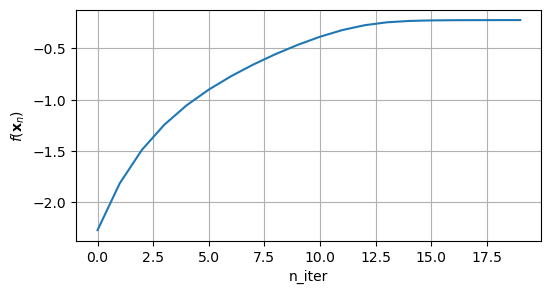

In [46]:
fig, ax = subplots(figsize=(6, 3))
ax.plot(f_seq)
ax.set(xlabel="n_iter", ylabel=L"f(\mathbf{x}_n)")
ax.grid();

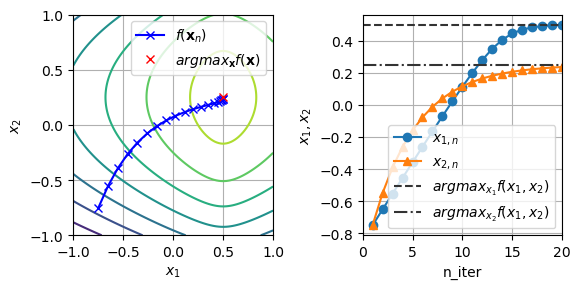

In [47]:
fig, ax = subplots(1, 2, figsize=(6, 3))

ax[1].contour(xs1, xs2, [f2([x1, x2]) for x1 in xs1, x2 in xs2]')
ax[1].plot(x_seq[1, :], x_seq[2, :], "-bx", label=L"$f(\mathbf{x}_n)$")
ax[1].plot(x_opt[1], x_opt[2], "rx", label=L"argmax_\mathbf{x}f(\mathbf{x})")
ax[1].set(xlabel=L"x_1", ylabel=L"x_2")
ax[1].legend()
ax[1].grid()

ax[2].plot(1:maxiter, x_seq[1, :], color="C0", marker="o", label=L"x_{1, n}")
ax[2].plot(1:maxiter, x_seq[2, :], color="C1", marker="^", label=L"x_{2, n}")
ax[2].hlines(x_opt[1], 0, maxiter, color=".2", ls="--", label=L"argmax_{x_1}f(x_1, x_2)")
ax[2].hlines(x_opt[2], 0, maxiter, color=".2", ls="-.", label=L"argmax_{x_2}f(x_1, x_2)")
ax[2].set(xlabel="n_iter", ylabel=L"x_1, x_2", xlim=[0, maxiter])
ax[2].legend(loc="lower right")
ax[2].grid()

tight_layout()

### Global Optimum & Local Optima

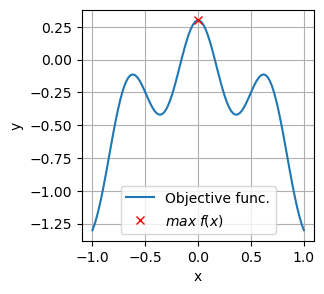

In [48]:
# Objective Function

fc(x) = 0.3cos(3pi * x) - x ^2

fig, ax = subplots(figsize=(3, 3))
xs = range(-1, 1, length=100)
ax.plot(xs, fc.(xs), label="Objective func.")
ax.plot(0, fc(0), "rx", label=L"max\;f(x)")
ax.set(xlabel="x", ylabel="y")
ax.grid()
ax.legend();

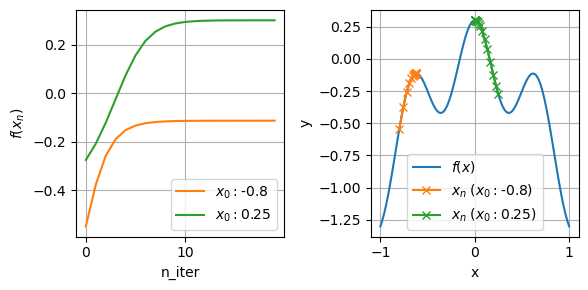

In [49]:
x0 = [-.8, .25]
η, maxiter = .01, 20

x_seq = map(x0 -> gradient_method_1d(fc, x0, η, maxiter), x0)
f_seq = map(x_seq -> fc.(x_seq), x_seq)

fig, ax = subplots(1, 2, figsize=(6, 3))
xs = range(-1, 1, length=100)
ax[2].plot(xs, fc.(xs), label=L"f(x)")

for i in 1:length(x_seq)
    ax[1].plot(f_seq[i], label=L"x_0:" * "$(x0[i])", color="C$(i)")
    ax[2].plot(
        x_seq[i], f_seq[i], label=L"x_n\;(x_0:" * "$(x0[i]))", color="C$(i)", marker="x"
    )
end

ax[1].set(xlabel="n_iter", ylabel=L"f(x_n)")
ax[2].set(xlabel="x", ylabel="y")

[a.legend() for a in ax]
[a.grid() for a in ax]
tight_layout()

## Curve Fitting

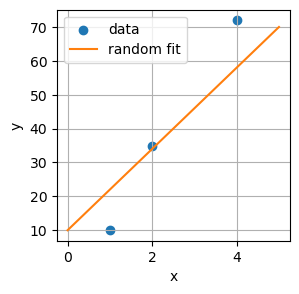

In [50]:
xd = [1, 2, 4]
yd = [10, 35, 72]

w = [12, 10]
f_rand(x) = w[1] * x + w[2]

fig, ax = subplots(figsize=(3, 3))
ax.scatter(xd, yd, label="data")

xs = range(0, 5, length=100)
ax.plot(xs, f_rand.(xs), label="random fit", color="C1")
ax.set(xlabel="x", ylabel="y")
ax.grid()
ax.legend();

- MSE

In [51]:
mse(w) = sum([(yd[n] - (w[1] * xd[n] + w[2])) ^2 for n in 1:length(xd)])

mse (generic function with 1 method)

In [52]:
w0, η, maxiter = [.0, .0], .01, 500
f_obj(w) = -mse(w) # gradient_method maximizes the objective func
w_seq = gradient_method(f_obj, w0, η, maxiter)
f_seq = [f_obj(w_seq[:, i]) for i in 1:maxiter]

w1, w2 = w_seq[:, end]
println("w1: $(w1), w2: $(w2)")

w1: 20.345436819385633, w2: -8.465882327774901


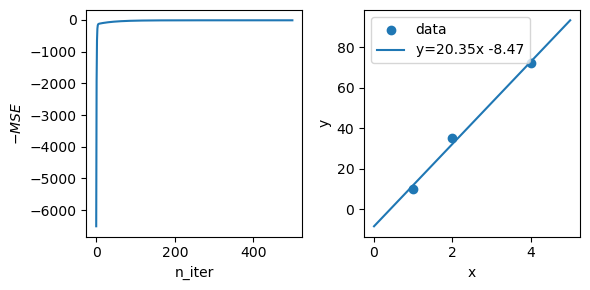

In [53]:
fig, ax = subplots(1, 2, figsize=(6, 3))

ax[1].plot(f_seq)
ax[1].set(xlabel="n_iter", ylabel=L"-MSE")
ax[2].scatter(xd, yd, label="data")
ax[2].plot(
    xs, map(x -> w1 * x + w2, xs),
    label="y=$(round(w1, digits=2))x$(w2 > 0 ? string('+') : ' ')$(round(w2, digits=2))"
)
ax[2].set(xlabel="x", ylabel="y")
ax[2].legend()

tight_layout()

- cf.) Analytical Solutions of MSE on Linear Functions

In [54]:
function linear_fit(y, x)
    N = length(y)
    w₁ = sum((y .- mean(y)) .* x) / sum((x .- mean(x)) .*x)
    w₂ = mean(y) - w₁ * mean(x)
    w₁, w₂
end

w₁, w₂ = linear_fit(yd, xd)
println("w1: $(w₁), w2: $(w₂)")

w1: 20.35714285714286, w2: -8.500000000000014


## Computation of Integrations

### Numerical Integration of Univariate Function

In [55]:
function approx_integration(x_range, f)
    Δ = x_range[2] - x_range[1]
    sum(map(x -> f(x) * Δ, x_range)), Δ
end

approx_integration (generic function with 1 method)

- Gaussian Integral

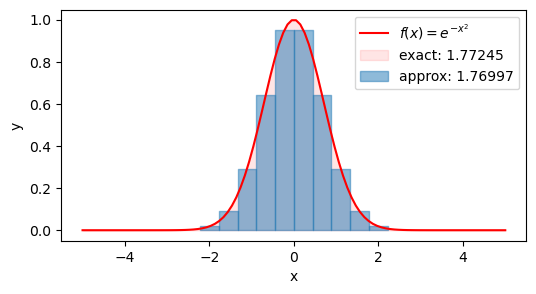

In [56]:
f(x) = exp(-x^2) # Function to be integrated

x_range = range(-2, 2, length=10)
approx, Δ = approx_integration(x_range, f)

fig, ax = subplots(figsize=(6, 3))
xs = range(-5, 5, length=100)
ax.plot(xs, f.(xs), color="r", label=L"f(x)=e^{-x^2}")
ax.fill_between(
    xs, f.(xs), zeros(length(xs)), color="r", alpha=.1,
    label="exact: $(round(sqrt(pi), digits=5))"
)
for (i, x) in enumerate(x_range)
    ax.fill_between(
        [x - Δ / 2, x + Δ / 2], f(x) * ones(2), zeros(2), alpha=.5,
        color="C0", label=i == 1 ? "approx: $(round(approx, digits=5))" : ""
    )
end

ax.set(xlabel="x", ylabel="y")
ax.legend();

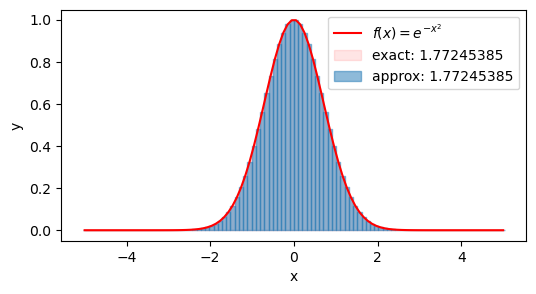

In [57]:
# Re-calculation with more precise approximation

x_range = range(-5, 5, length=100)
approx, Δ = approx_integration(x_range, f)

fig, ax = subplots(figsize=(6, 3))
xs = range(-5, 5, length=100)
ax.plot(xs, f.(xs), color="r", label=L"f(x)=e^{-x^2}")
ax.fill_between(
    xs, f.(xs), zeros(length(xs)), color="r", alpha=.1,
    label="exact: $(round(sqrt(pi), digits=8))"
)
for (i, x) in enumerate(x_range)
    ax.fill_between(
        [x - Δ / 2, x + Δ / 2], f(x) * ones(2), zeros(2), alpha=.5,
        color="C0", label=i == 1 ? "approx: $(round(approx, digits=8))" : ""
    )
end

ax.set(xlabel="x", ylabel="y")
ax.legend();

- Examples where numerical integration doesn't work well

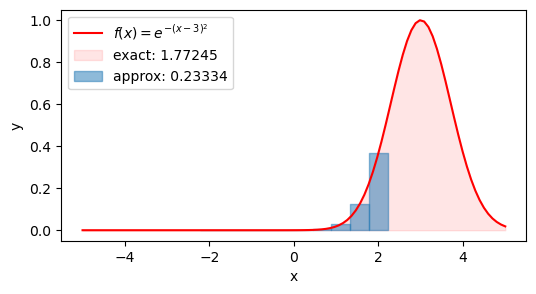

In [58]:
f(x) = exp(-(x - 3)^2) # Function to be integrated

x_range = range(-2, 2, length=10)
approx, Δ = approx_integration(x_range, f)

fig, ax = subplots(figsize=(6, 3))
xs = range(-5, 5, length=100)
ax.plot(xs, f.(xs), color="r", label=L"f(x)=e^{-(x-3)^2}")
ax.fill_between(
    xs, f.(xs), zeros(length(xs)), color="r", alpha=.1,
    label="exact: $(round(sqrt(pi), digits=5))"
)
for (i, x) in enumerate(x_range)
    ax.fill_between(
        [x - Δ / 2, x + Δ / 2], f(x) * ones(2), zeros(2), alpha=.5,
        color="C0", label=i == 1 ? "approx: $(round(approx, digits=5))" : ""
    )
end

ax.set(xlabel="x", ylabel="y")
ax.legend();

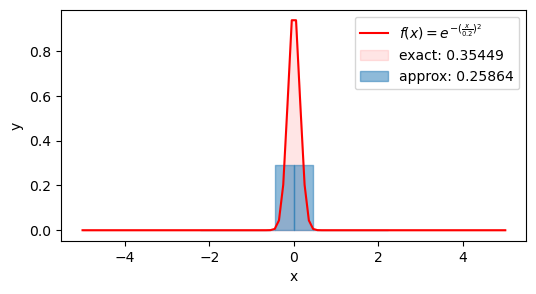

In [59]:
f(x) = exp(-(x / .2)^2) # Function to be integrated

x_range = range(-2, 2, length=10)
approx, Δ = approx_integration(x_range, f)

fig, ax = subplots(figsize=(6, 3))
xs = range(-5, 5, length=100)
ax.plot(xs, f.(xs), color="r", label=L"f(x)=e^{-(\frac{x}{0.2})^2}")
ax.fill_between(
    xs, f.(xs), zeros(length(xs)), color="r", alpha=.1,
    label="exact: $(round(0.2 * sqrt(pi), digits=5))"
)
for (i, x) in enumerate(x_range)
    ax.fill_between(
        [x - Δ / 2, x + Δ / 2], f(x) * ones(2), zeros(2), alpha=.5,
        color="C0", label=i == 1 ? "approx: $(round(approx, digits=5))" : ""
    )
end

ax.set(xlabel="x", ylabel="y")
ax.legend();

## Numerical Integration of Multivariate Function

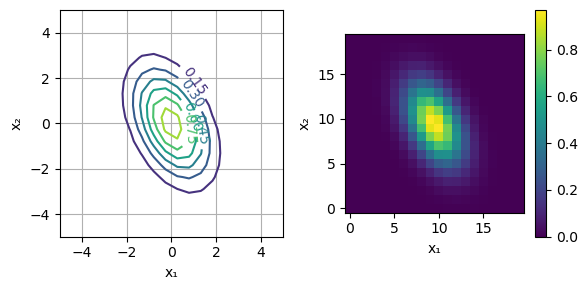

In [60]:
# Objective bivariate function
D = 2
A = [.5 .3;
    .3 1.0]
f2(x) = exp(-.5 * x' * A * x)

L = 20 # number of subareas in one axis
xs1 = xs2 = range(-5, 5, length=L)

fig, ax = subplots(1, 2, figsize=(6, 3))

cs = ax[1].contour(repeat(xs1, 1, L), repeat(xs2', L, 1), [f2([x1, x2]) for x1 in xs1, x2 in xs2]')
ax[1].clabel(cs)
ax[1].grid()

cs = ax[2].imshow([f2([x1, x2]) for x1 in xs1, x2 in xs2], origin="lower")
fig.colorbar(cs)

[a.set(xlabel="x₁", ylabel="x₂") for a in ax]

tight_layout()

In [61]:
function approx_integration_2d(x_range, f)
    Δ = x_range[2] - x_range[1]
    sum([f([x1, x2]) * Δ ^2 for x1 in x_range, x2 in x_range]), Δ
end

approx_integration_2d (generic function with 1 method)

In [62]:
using LinearAlgebra

In [63]:
L = 20
x_range = range(-5, 5, length=L)
approx, Δ = approx_integration_2d(x_range, f2)

println("approx: $(approx)")
println("exact: $(sqrt((2pi)^D/det(A)))")

approx: 9.805714174433017
exact: 9.812686860654528


In [64]:
L = 1000
x_range = range(-100, 100, length=L)
approx, Δ = approx_integration_2d(x_range, f2)

println("approx: $(approx)")
println("exact: $(sqrt((2pi)^D/det(A)))")

approx: 9.812686860654521
exact: 9.812686860654528
